# Assignment 5 

In [1]:
# imports and load images
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

cwd = os.getcwd()

# Load images
wirebound = cv2.imread(cwd + '/Wirebond.tif', 0)
shapes = cv2.imread(cwd + '/Shapes.tif', 0)
dowel = cv2.imread(cwd + '/Dowels.tif', 0)
small_squares = cv2.imread(cwd + '/SmallSquares.tif', 0)
ball = cv2.imread(cwd + '/Ball.tif', 0)


## Problem I: Problem Solving Using Morphological Operations [Total: 20 points]
### 1.
Apply morphological operation(s) on Wirebond.tif to obtain three desired images as shown in
(b), (c), and (d), respectively. Display the three resultant images in Figure 1 with appropriate titles.

![problem-1-example.png](problem-1-example.png)

Apply morphological operation(s) on Shapes.tif to obtain three desired images as shown in (f),
(g), and (h), respectively. Display the three resultant images in Figure 2 with appropriate titles

![assignment-5-problem1.png](assignment-5-problem1.png)

Note: Here, I list the original image for your reference so you can visually compare the differences between
the original image and the expected resultant images. As long as your resultant images are similar to the
ones posted on the assignment sheet, you will get full credit



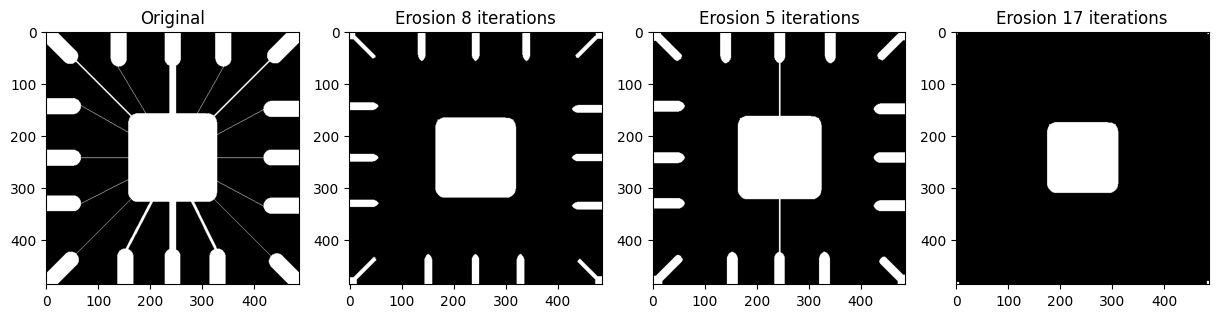

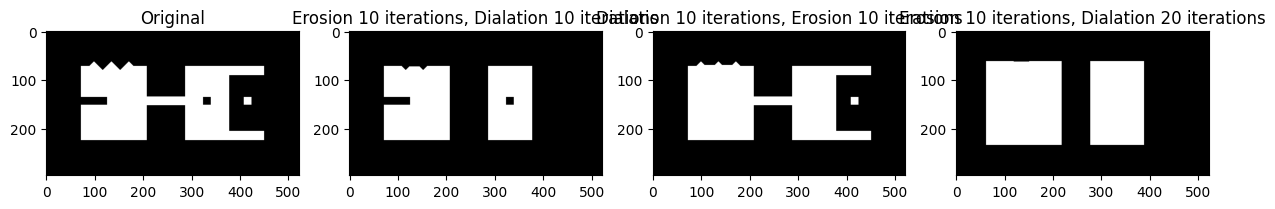

In [2]:


# modified image 1 errosion morphological operation
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(wirebound, kernel, iterations=8)


kernel = np.ones((3, 3), np.uint8)
erosion2 = cv2.erode(wirebound, kernel, iterations=5)


kernel = np.ones((3, 3), np.uint8)
erosion3 = cv2.erode(wirebound, kernel, iterations=17)


# display wirebound, erosion, erosion2, erosion3 images in a horizontal row
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(wirebound, cmap='gray')
plt.title('Original')
plt.subplot(1, 4, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Erosion 8 iterations')
plt.subplot(1, 4, 3)
plt.imshow(erosion2, cmap='gray')
plt.title('Erosion 5 iterations')
plt.subplot(1, 4, 4)
plt.imshow(erosion3, cmap='gray')
plt.title('Erosion 17 iterations')
plt.show()


# perform dialation morphological operation on shapes image
kernel = np.ones((3, 3), np.uint8)
shape_modified = cv2.erode(shapes, kernel, iterations=10)
shape_modified = cv2.dilate(shape_modified, kernel, iterations=10)

# perform opening morphological operation on shapes image
kernel = np.ones((3, 3), np.uint8)
shape_modified_2 = cv2.dilate(shapes, kernel, iterations=10)
shape_modified_2 = cv2.erode(shape_modified_2, kernel, iterations=10)


# perform closing morphological operation on shapes image
kernel = np.ones((3, 3), np.uint8)
shape_modified_3 = cv2.erode(shapes, kernel, iterations=10)
shape_modified_3 = cv2.dilate(shape_modified_3, kernel, iterations=20)

# display shapes, shape_modified, shape_modified_2, shape_modified_3 images in a horizontal row
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(shapes, cmap='gray')
plt.title('Original')
plt.subplot(1, 4, 2)
plt.imshow(shape_modified, cmap='gray')
plt.title('Erosion 10 iterations, Dialation 10 iterations')
plt.subplot(1, 4, 3)
plt.imshow(shape_modified_2, cmap='gray')
plt.title('Dialation 10 iterations, Erosion 10 iterations')
plt.subplot(1, 4, 4)
plt.imshow(shape_modified_3, cmap='gray')
plt.title('Erosion 10 iterations, Dialation 20 iterations')
plt.show()





### 2. 
Apply an open-close operation on Dowels.tif using a disk structuring element of radius 5 (i.e.,
an open operation followed by a close operation is applied to the original image using the same structuring
element). Apply a close-open operation on Dowel.tif using a disk structuring element of radius 5 (i.e., a
close operation followed by an open operation is applied to the original image using the same structuring
element). Display two resultant images in Figure 3 side-by-side.
Apply a series of open-close operations on Dowel.tif using a series of structuring elements of increasing
size (i.e., a disk structuring element of a radius of 2, 3, 4, and 5). Similarly, apply a series of close-open
operations on Dowel.tif using a series of structuring elements of increasing size (i.e., a disk structuring
element of a radius of 2, 3, 4, and 5). Display two resultant images in Figure 4 side-by-side. You have to
use “loop” to include the series of open-close operations or close-open operations. In other words, each
loop will perform one open-close or close-open operation with a disk structuring element of a certain radius.

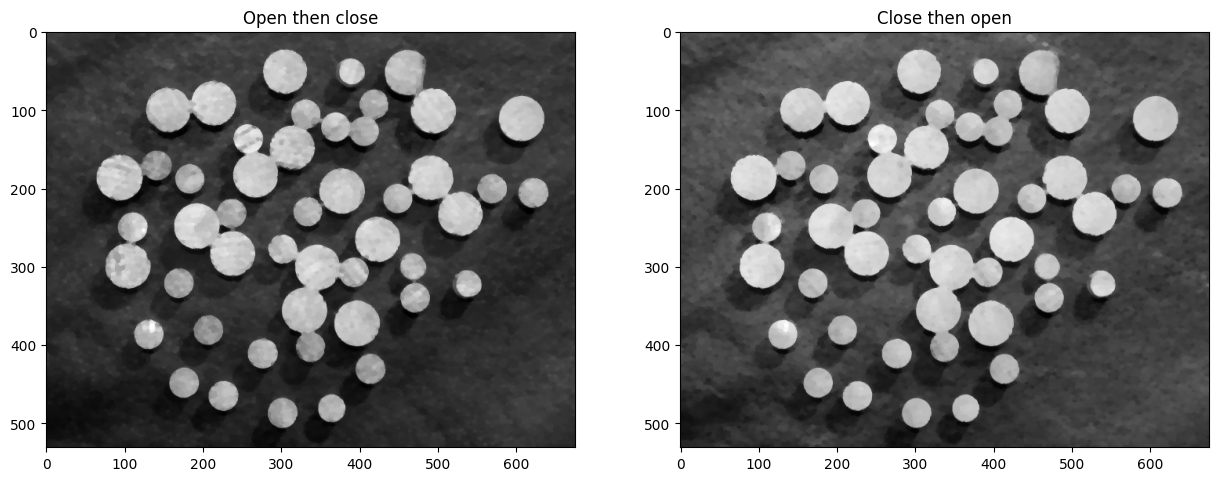

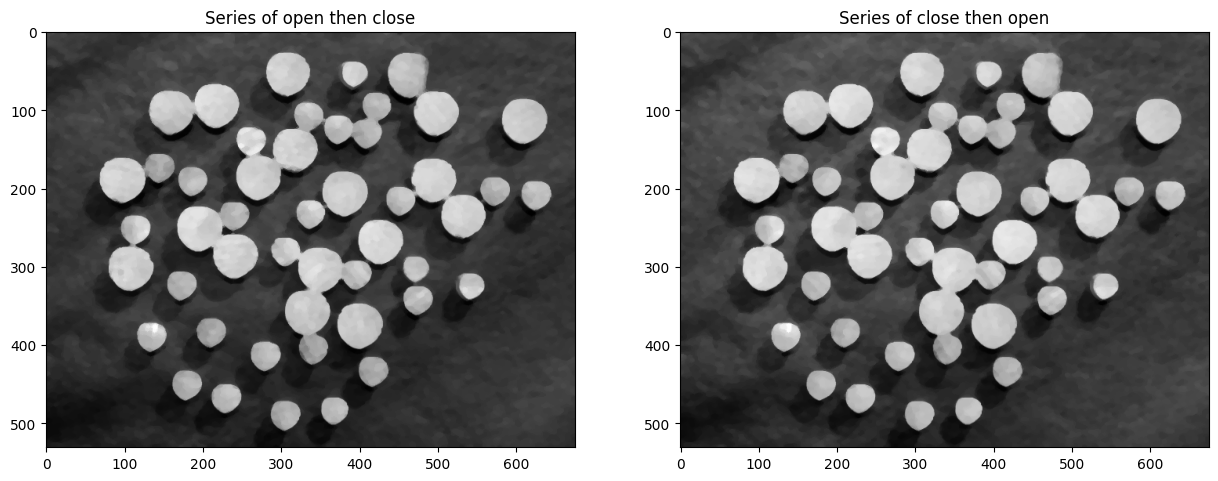

In [3]:
radiuses = [5, 2, 3, 4, 5]
kernal_readius_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

open_close_5_image = cv2.morphologyEx(dowel.copy(), cv2.MORPH_OPEN, kernal_readius_5)
open_close_5_image = cv2.morphologyEx(open_close_5_image, cv2.MORPH_CLOSE, kernal_readius_5)

close_open_5_image = cv2.morphologyEx(dowel.copy(), cv2.MORPH_CLOSE, kernal_readius_5)
close_open_5_image = cv2.morphologyEx(close_open_5_image, cv2.MORPH_OPEN, kernal_readius_5)

# display open_close_5_image, close_open_5_image images in a horizontal row
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(open_close_5_image, cmap='gray')
plt.title('Open then close')
plt.subplot(1, 2, 2)
plt.imshow(close_open_5_image, cmap='gray')
plt.title('Close then open')
plt.show()


radiuses = [2, 3, 4, 5]

series_of_open_close_image = dowel.copy()
for radius in radiuses:
    kernal_readius = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius, radius))
    series_of_open_close_image = cv2.morphologyEx(series_of_open_close_image, cv2.MORPH_OPEN, kernal_readius)
    series_of_open_close_image = cv2.morphologyEx(series_of_open_close_image, cv2.MORPH_CLOSE, kernal_readius)

series_of_close_open_image = dowel.copy()
for radius in radiuses:
    kernal_readius = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius, radius))
    series_of_close_open_image = cv2.morphologyEx(series_of_close_open_image, cv2.MORPH_CLOSE, kernal_readius)
    series_of_close_open_image = cv2.morphologyEx(series_of_close_open_image, cv2.MORPH_OPEN, kernal_readius)

# display series_of_open_close_image, series_of_close_open_image images in a horizontal row
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(series_of_open_close_image, cmap='gray')
plt.title('Series of open then close')
plt.subplot(1, 2, 2)
plt.imshow(series_of_close_open_image, cmap='gray')
plt.title('Series of close then open')
plt.show()




### 3

Apply morphological operation(s) on SmallSquares.tif to locate foreground pixels that have
east and north neighbors and that have no northwest, west, southwest, south, or southeast neighbors.
Display the final resultant image in Figure 5. Use the console to show the number of foreground pixels that
satisfy the above conditions.


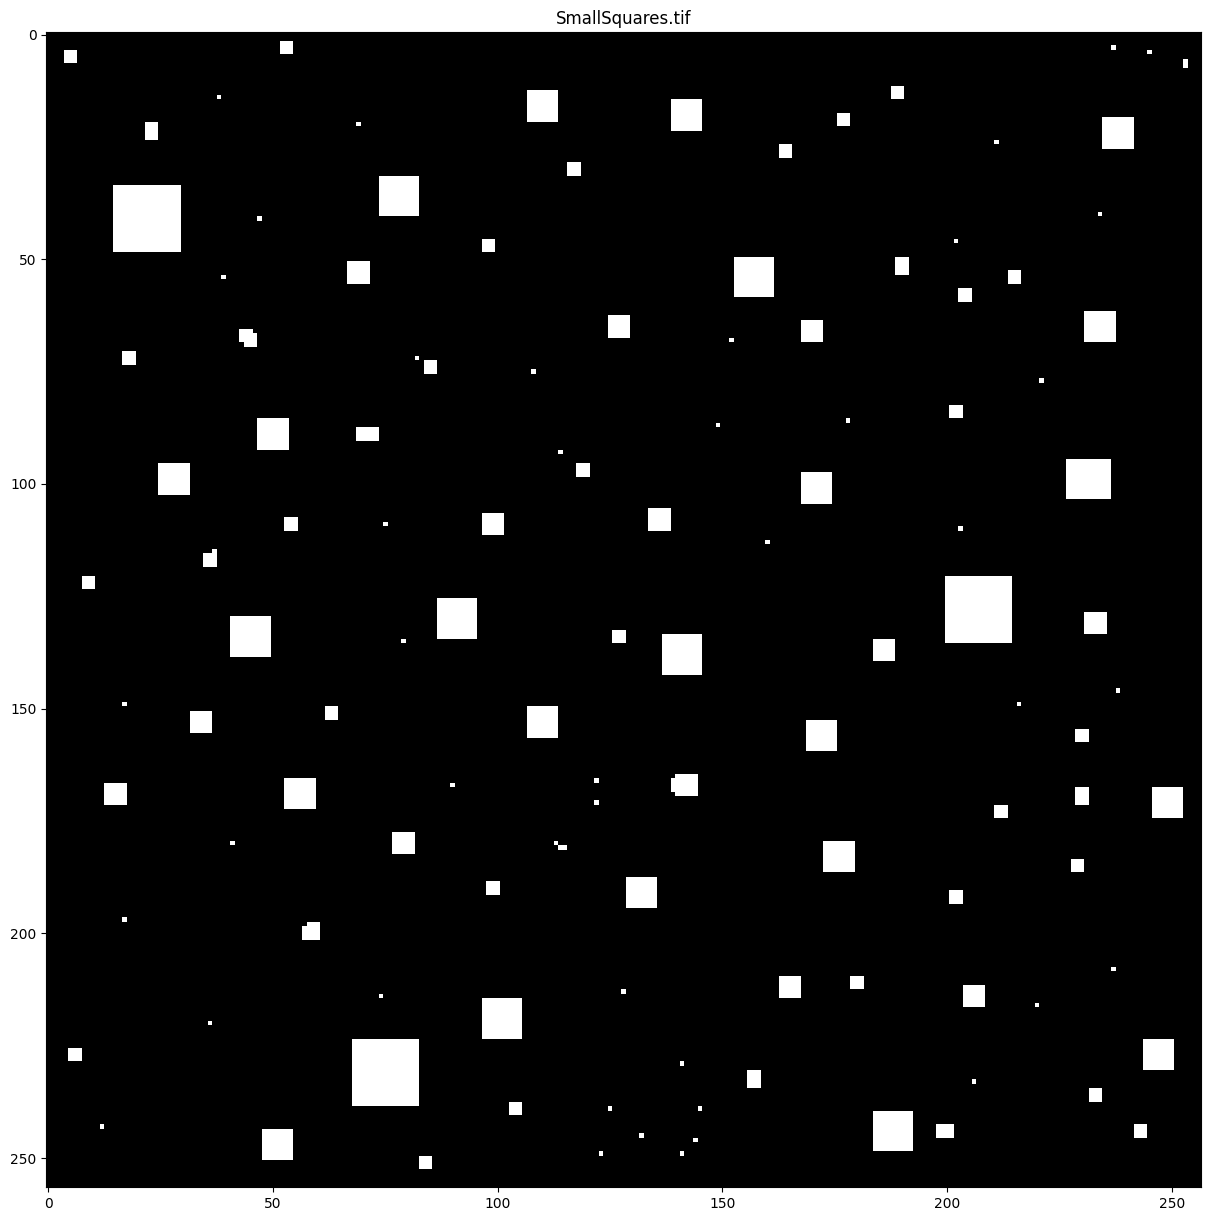

Number of pixels satisfying the kernel:  2028


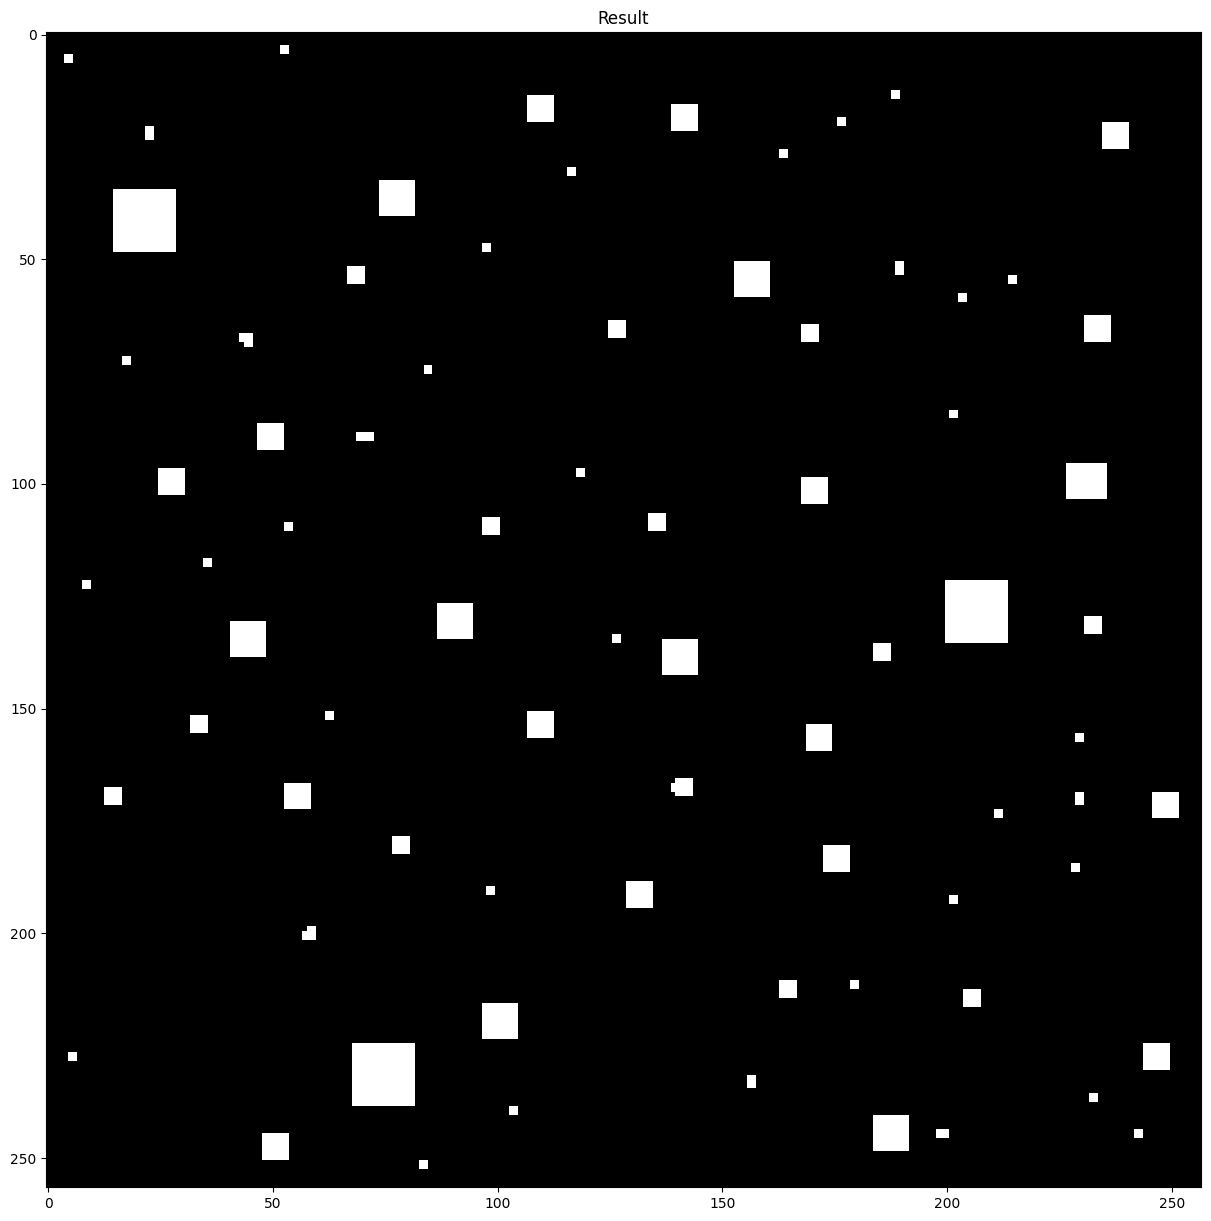

In [4]:
# display SmallSquares.tif image
plt.figure(figsize=(15, 15))
plt.subplot(1, 1, 1)
plt.imshow(small_squares, cmap='gray')
plt.title('SmallSquares.tif')
plt.show()

kernel = np.array([[0, 1, 0],
                  [0, 1, 1],
                  [0, 0, 0]], dtype=np.uint8)

result = cv2.morphologyEx(small_squares, cv2.MORPH_HITMISS, kernel)

num_satisfying_pixels = np.count_nonzero(result)
print('Number of pixels satisfying the kernel: ', num_satisfying_pixels)

# display result image
plt.figure(figsize=(15, 15))
plt.subplot(1, 1, 1)
plt.imshow(result, cmap='gray')
plt.title('Result')
plt.show()


## Problem II: Applications of Morphological Operations 
A preprocessing step in the application of microscopy is to isolate individual round particles from similar
particles that overlap in a group of two or more particles (see image “Ball.tif”). Assuming that all particles
are of the same size, use the “extraction of connected components” morphological operation as described
below to solve the following sub-problems.

Let Y be a connected component contained in image A and assume that a point p of Y is known. Then the
following iterative expression yields all the elements of Y.

![formula-problem-2-assignment-des.png](formula-problem-2-assignment-des.png)


wherepX =0 and B is a suitable structuring element.
The algorithm terminates at iteration step k if Xk = Xk-1. The algorithm converges to Y = Xk.

The algorithm terminates at iteration step k if Xk = Xk-1. The algorithm converges to Y = Xk.

### 1.

Using the idea of “extraction of connected components” to implement a
FindComponentLabels function to label connected objects (i.e., connected components with the value of
1’s) in a binary image. This function has two input parameters, where im is the original binary image and
se is the structuring element. It has two output parameters labelIm and num, where labelIm is the labeled
image that contains the labeled connected objects (Please sequentially label the connected objects with
1 being the starting label) and num is the number of connected objects (i.e., the largest label for a
connected object) found in the binary image. It should be noted that different connected objects have
different labels and the labels for all the elements in a connected object are the same. In addition, the
smallest label for a connected object is 1 and the largest label for a connected object is num

Call the FindComponentLabels function to label the connected particles and return the total number of
connected particles in a given image Ball.tif. Use the console to display the total number of connected
particles in Ball.tif found by FindComponentLabels. Display these connected objects in Figure 6 using
appropriate visible gray-level intensities or color intensities.

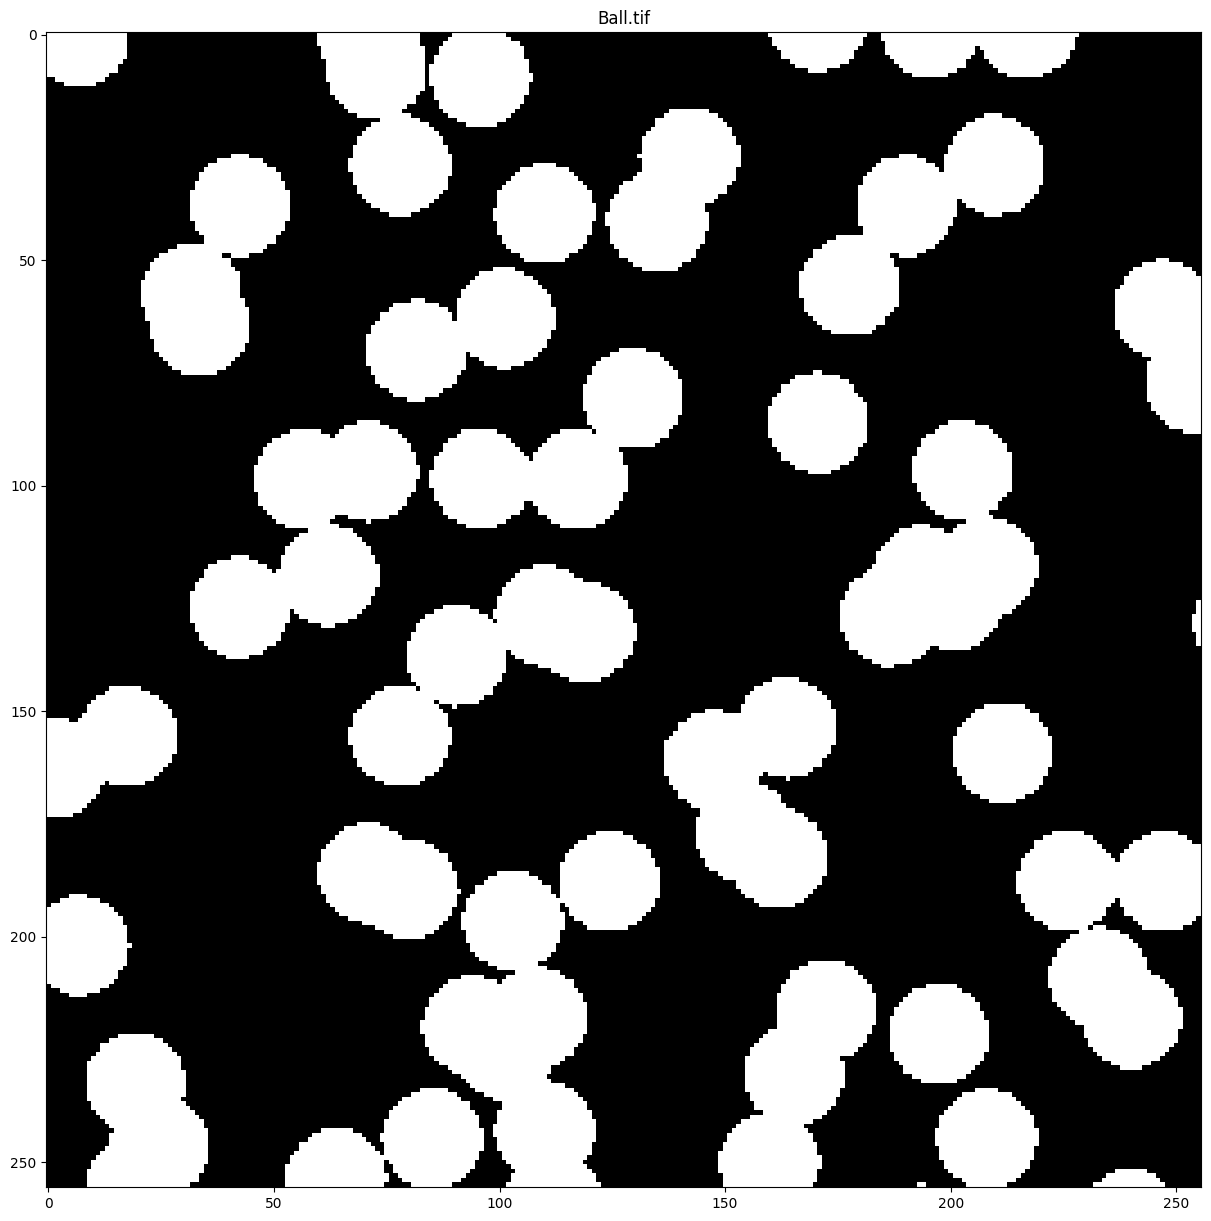

Total number of connected particles: 31


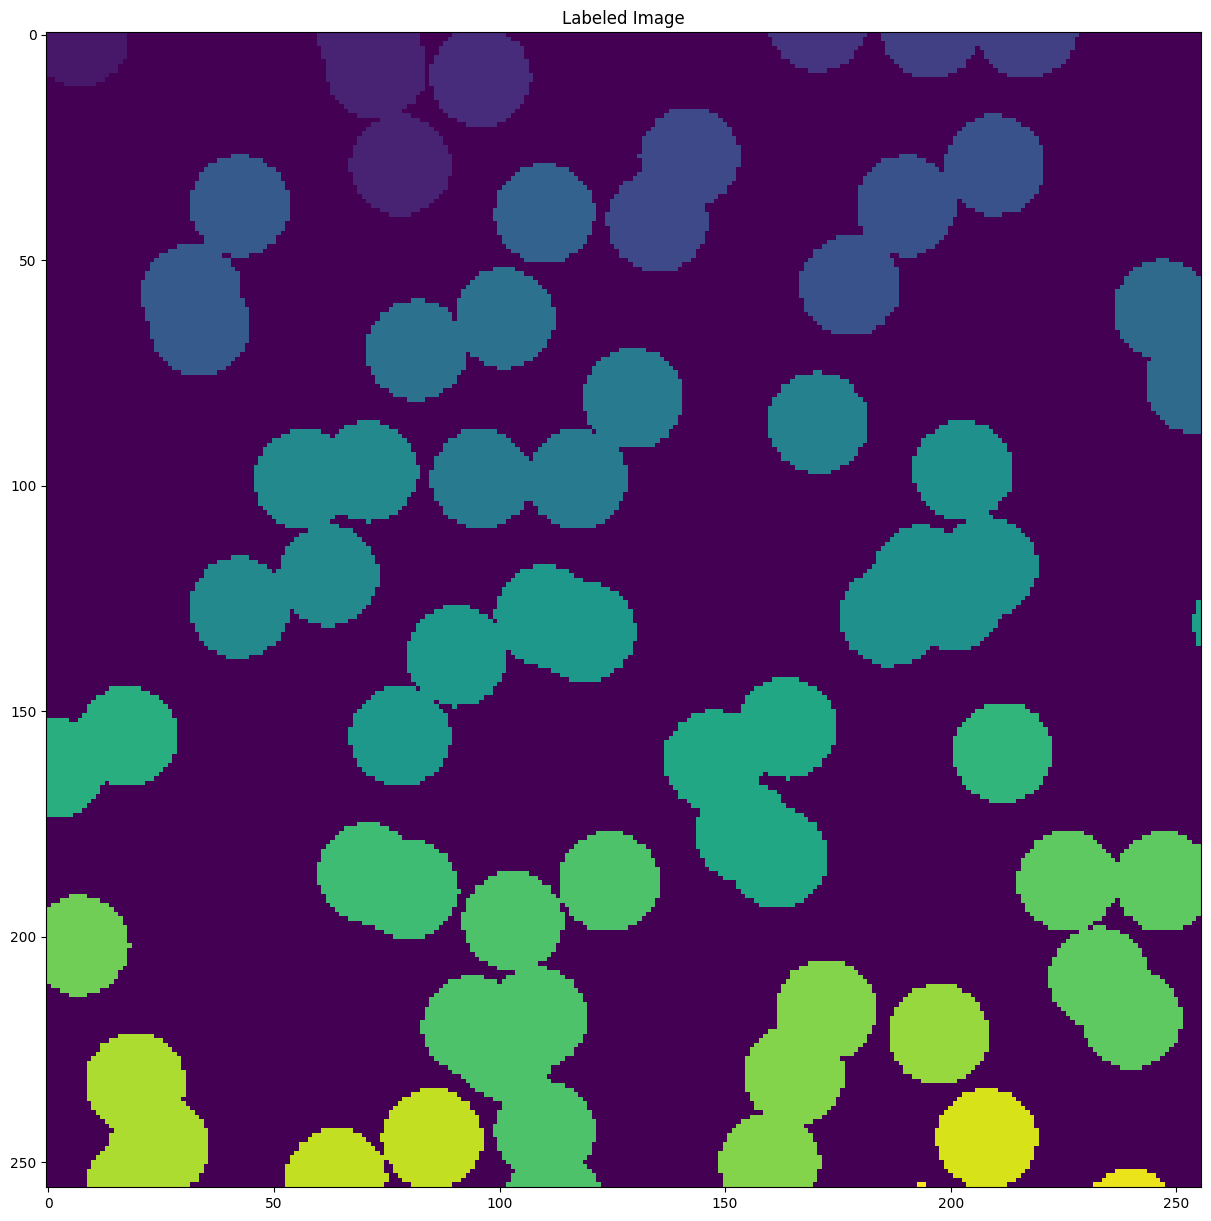

In [5]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 1, 1)
plt.imshow(ball, cmap='gray')
plt.title('Ball.tif')
plt.show()

def FindComponentLabels(im):
    im = im > 0

    # Initialize the labeled image and the number of connected objects
    labelIm = np.zeros(im.shape, dtype=np.uint16)
    num = 1

    for y in range(im.shape[0]):
        for x in range(im.shape[1]):
            if im[y, x] and labelIm[y, x] == 0:
                num += 1
                labelIm, _ = ExtractConnectedComponent(im, labelIm, x, y, num)

    return labelIm, num

def ExtractConnectedComponent(im, labelIm, x, y, num):
    # Create an empty mask
    mask = np.zeros(im.shape, dtype=np.uint8)

    # Initialize the current point list
    current_points = [(x, y)]

    while len(current_points) > 0:
        x, y = current_points.pop()
        if 0 <= x < im.shape[1] and 0 <= y < im.shape[0] and im[y, x] and labelIm[y, x] == 0:
            labelIm[y, x] = num
            mask[y, x] = 255
            dx = [-1, 1, 0, 0]
            dy = [0, 0, -1, 1]
            current_points.extend((x + dx, y + dy) for dx, dy in zip(dx, dy))


    return labelIm, mask

im = ball

# Label connected components in the image
labelIm, num = FindComponentLabels(im)

print("Total number of connected particles:", num-1)

# change the labelIm so that it is easier to see the different labels
labelIm = labelIm * 100


plt.figure(figsize=(15, 15))
plt.imshow(labelIm)
plt.title('Labeled Image')
plt.show()


### 2
Call an appropriate built-in function, which accomplishes the same functionality as the
FindComponentLabels function, to label connected particles and return the total number of connected
particles. Use the console to display the number of connected particles in Ball.tif found by the built-in
function. Display these connected particles in Figure 7 using appropriate visible gray-level intensities or
color intensities. Note: Depending on the implementation, FindComponentLabels function and built-in
function may label the same connected particles using different labels. However, the total number of
connected particles should be the same

Total number of connected particles: 31


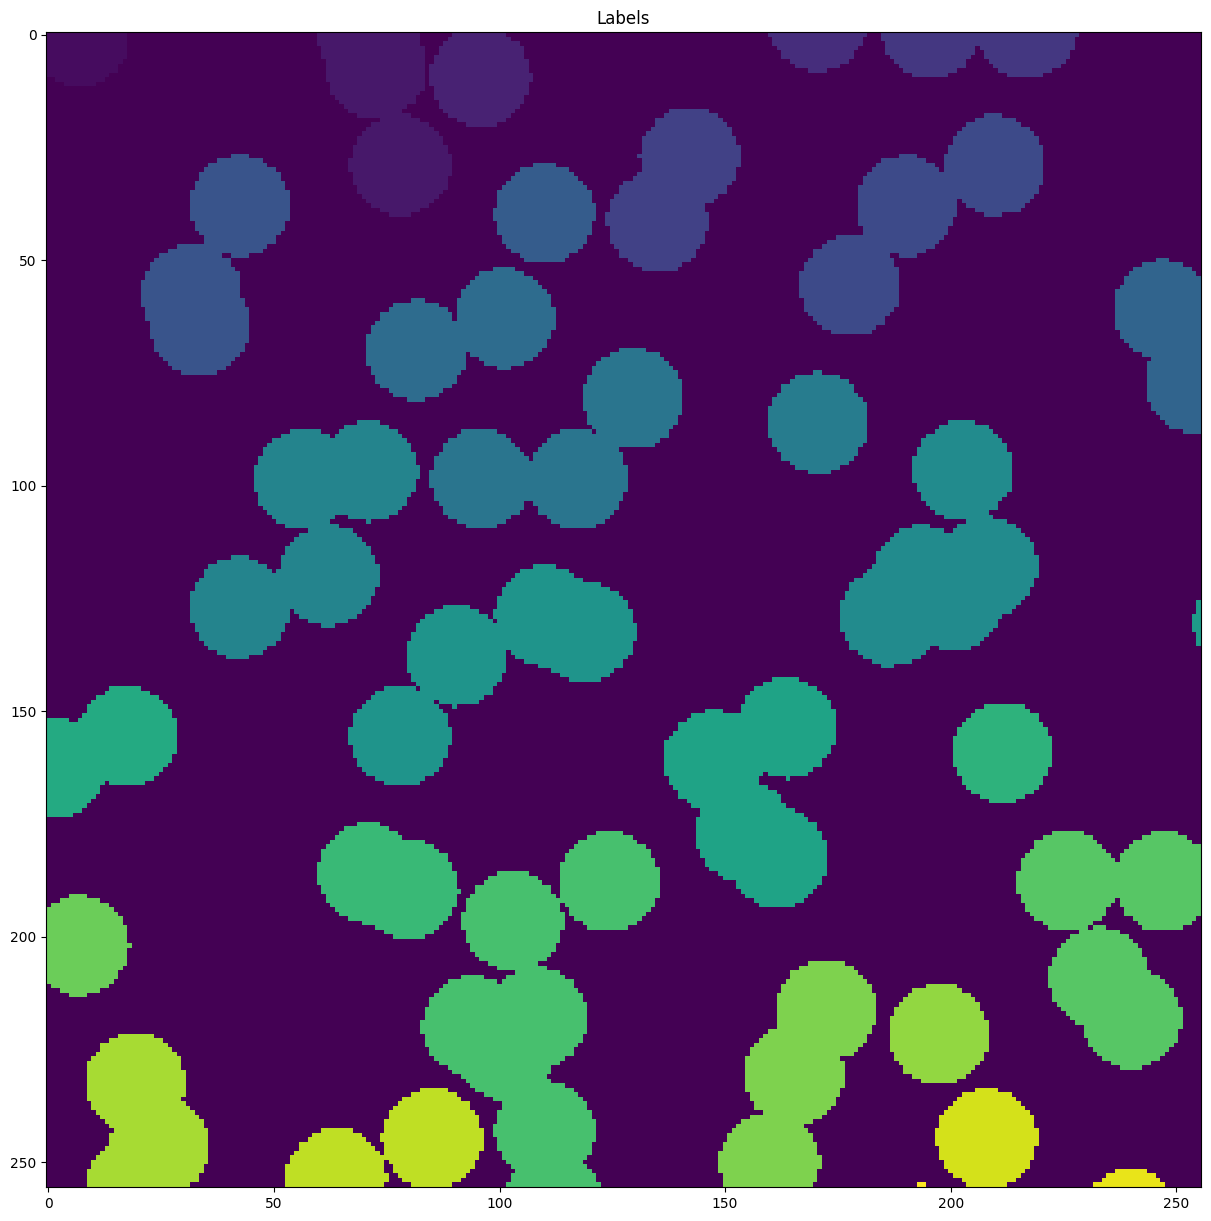

In [6]:
num_labels, labels = cv2.connectedComponents(ball)

# Subtract 1 from num_labels to account for the background label
num_connected_particles = num_labels - 1

# Display the total number of connected particles
print("Total number of connected particles:", num_connected_particles)

# display labels image
plt.figure(figsize=(15, 15))
plt.imshow(labels)
plt.title('Labels')
plt.show()


### 3
Produce an image A containing only connected particles residing on the border (i.e., four
sides) of the image. Display the original image and image A side-by-side in Figure 8 with appropriate titles.
Use the console to show the number of connected particles residing on the border. You have to write your
solution to this problem without calling a built-in function.

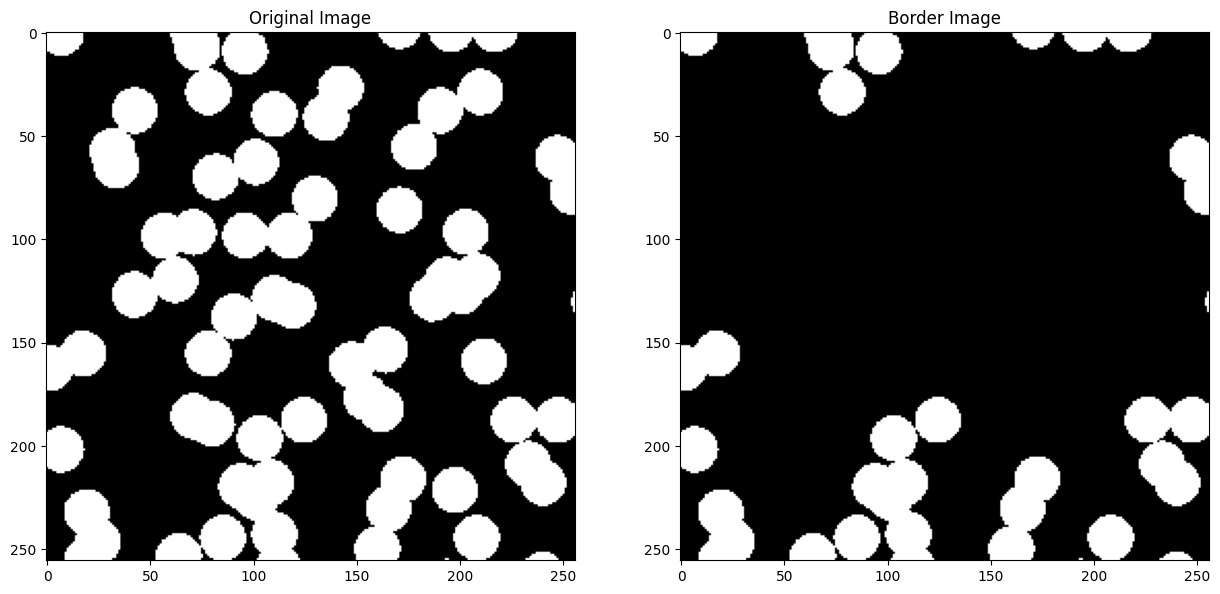

Number of connected particles residing on the border: 31


In [7]:
# Label connected components using cv2.connectedComponents
num_labels, labels = cv2.connectedComponents(ball)

# Subtract 1 from num_labels to account for the background label
num_connected_particles = num_labels - 1

# Create a binary image with only connected particles on the border
border_image = np.zeros(im.shape, dtype=np.uint8)

# Check if each labeled component touches the border
for label in range(1, num_labels):
    component_mask = (labels == label)
    
    # Check if the component touches the border
    if np.any(component_mask[0, :] | component_mask[-1, :] | component_mask[:, 0] | component_mask[:, -1]):
        border_image[component_mask] = 255

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(border_image, cmap='gray')
plt.title('Border Image')
plt.show()


# Count the number of connected particles residing on the border
num_connected_particles_on_border = np.max(labels[border_image > 0])
print("Number of connected particles residing on the border:", num_connected_particles_on_border)


### 4
Produce an image B containing only visually overlapping connected particles not residing
on the border of the image. Display the original image and image B side-by-side in Figure 9 with
appropriate titles. Use the console to show the number of overlapping connected particles that do not reside
on the border. Hint: Since all particles are of the same size, you may need to design a strategy to estimate
the size of the individual particle. Please DO NOT hard code any values to solve the problem.

Estimated size of individual particles: 704.8709677419355


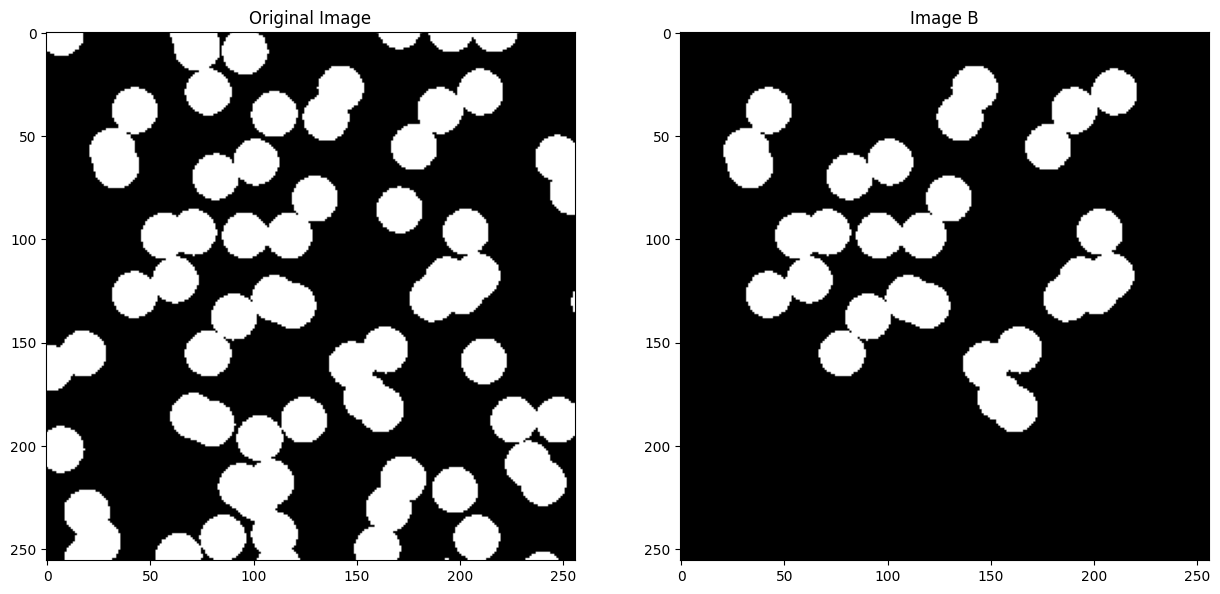

Number of overlapping connected particles not on the border: 18


In [8]:

# Label connected components using cv2.connectedComponentsWithStats
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(ball)

# Create a binary image B for overlapping connected particles
B = np.zeros(im.shape, dtype=np.uint8)

# Define a size threshold to distinguish single particles from overlapping ones
# You may need to adjust this threshold based on your specific image
size_threshold = 100  # Adjust as needed

# estimate the size of individual particles
print("Estimated size of individual particles:", np.mean(stats[1:, cv2.CC_STAT_AREA]))
average_particle_size = np.mean(stats[1:, cv2.CC_STAT_AREA])


# Check each labeled component
for label in range(1, num_labels):
    component_mask = (labels == label)
    
    # Calculate the area (size) of the component
    component_size = stats[label, cv2.CC_STAT_AREA]
    
    # Check if the component is not on the border and its size exceeds the threshold
    if not np.any(component_mask[0, :] | component_mask[-1, :] | component_mask[:, 0] | component_mask[:, -1]) and component_size >= average_particle_size:
        B[component_mask] = 255

# Display the original image and the image B side by side
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Image B')
plt.show()

# Count the number of overlapping connected particles not on the border
num_overlapping_particles = np.max(labels[B > 0])
print("Number of overlapping connected particles not on the border:", num_overlapping_particles)


### 5
Produce an image C containing only visually partial individual round particles residing on the
border of the image. Display the original image and image C side-by-side in Figure 10 with appropriate
titles. Use the console to show the number of visually partial individual round particles that reside on the
border.......,3,2,1)( 1 == − kABXX kk


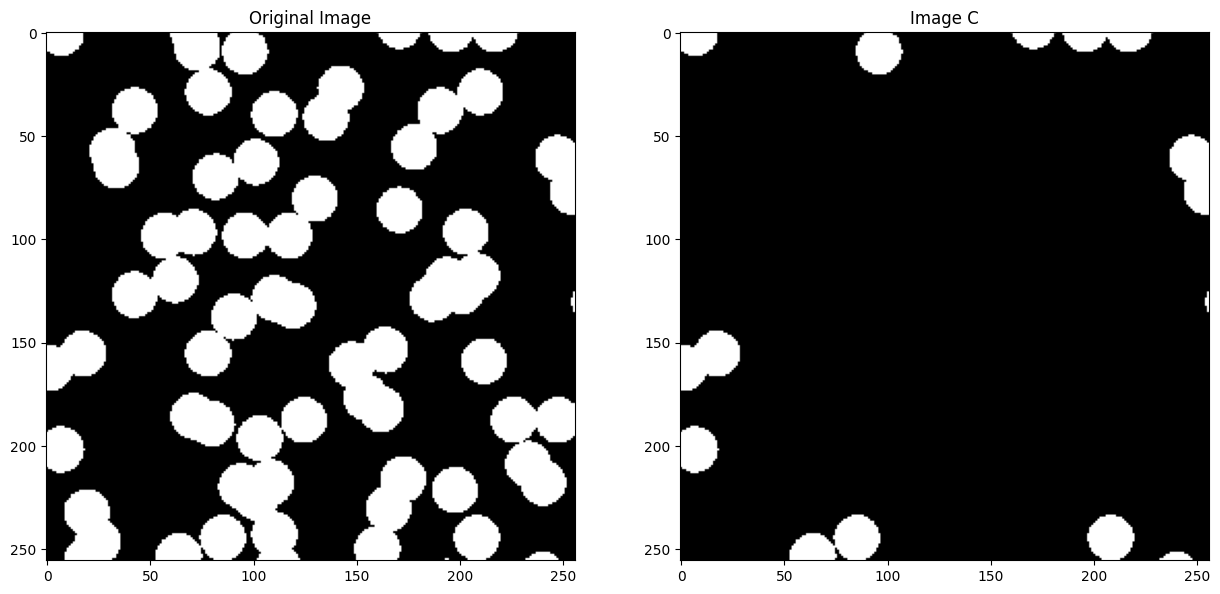

Number of visually partial individual round particles on the border: 30


In [9]:
# Label connected components using cv2.connectedComponentsWithStats
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(ball)

# Create a binary image C for visually partial round particles on the border
C = np.zeros(ball.shape, dtype=np.uint8)

# Define a threshold for circularity
average_particle_size = np.mean(stats[1:, cv2.CC_STAT_AREA])

# Check each labeled component
for label in range(1, num_labels):
    component_mask = (labels == label)
    
    # Calculate the centroid and bounding box of the component
    centroid_x, centroid_y = centroids[label]
    bounding_box_width = stats[label, cv2.CC_STAT_WIDTH]
    bounding_box_height = stats[label, cv2.CC_STAT_HEIGHT]
    
    # Check if the component is near the border
    is_near_border = (
        centroid_x < bounding_box_width or
        centroid_x > ball.shape[1] - bounding_box_width or
        centroid_y < bounding_box_height or
        centroid_y > ball.shape[0] - bounding_box_height
    )
        
    # Check if the component is less than the average_particle_size
    if is_near_border and label != 0 and stats[label, cv2.CC_STAT_AREA] < average_particle_size:
        C[component_mask] = 255

# Display the original image and the image C side by side
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(ball, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(C, cmap='gray')
plt.title('Image C')
plt.show()


# Count the number of visually partial individual round particles on the border
num_partial_round_particles_on_border = np.max(labels[C > 0])
print("Number of visually partial individual round particles on the border:", num_partial_round_particles_on_border)
